## Проснись, самурай, у нас есть что симулировать

In [57]:
import timeit
import random
import numpy as np
import matplotlib.pyplot as plt

## Task 1

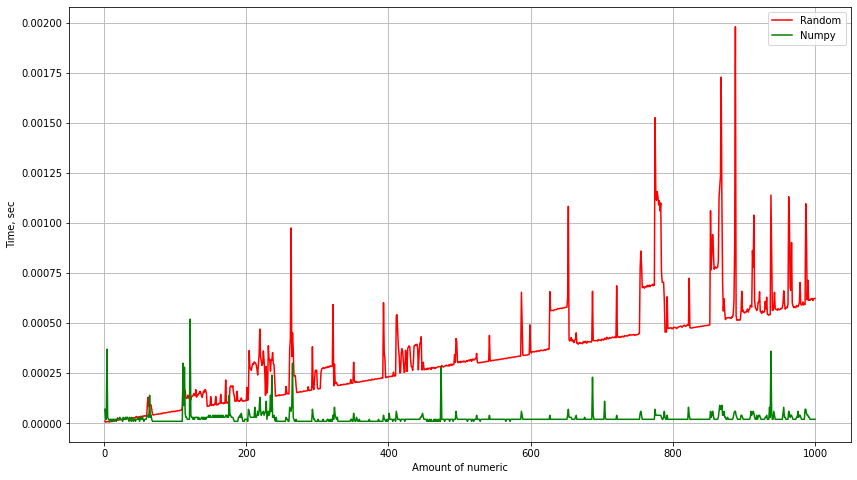

In [58]:
# 1000 numbers
amount_of_num = np.arange(1, 1001)

# array generation
time_for_random = np.zeros(1000)
time_for_np_random = np.zeros(1000)
for i in range(1000):
    # for random
    start = timeit.default_timer()
    for j in range(i+1):
        random.uniform(0, 1)
    stop = timeit.default_timer()
    time_for_random[i] = stop - start
    # for numpy
    start = timeit.default_timer()
    np.random.uniform(size=i+1)
    stop = timeit.default_timer()
    time_for_np_random[i] = round(stop - start, 5)
    
# Common graph
fig_dims = (14, 8)
fig, axes = plt.subplots(figsize=fig_dims)
axes.plot(amount_of_num, time_for_random, color="r")
axes.plot(amount_of_num, time_for_np_random, color="g")
axes.set(xlabel='Amount of numeric', ylabel='Time, sec')
plt.legend(['Random', 'Numpy'])
plt.grid()

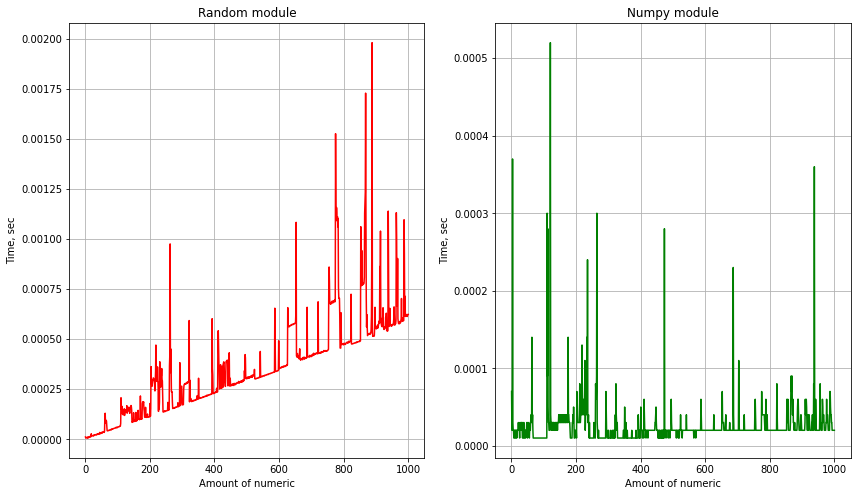

In [59]:
# graph
fig_dims = (14, 8)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
left_graph = axes[0]
right_graph = axes[1]

# Random
left_graph.plot(amount_of_num, time_for_random, color="r")
left_graph.set(xlabel='Amount of numeric', ylabel='Time, sec')
left_graph.set_title("Random module")
left_graph.grid()

# Numpy
right_graph.plot(amount_of_num, time_for_np_random, color="g")
right_graph.set(xlabel='Amount of numeric', ylabel='Time, sec')
right_graph.set_title("Numpy module")
right_graph.grid()

## Task 2

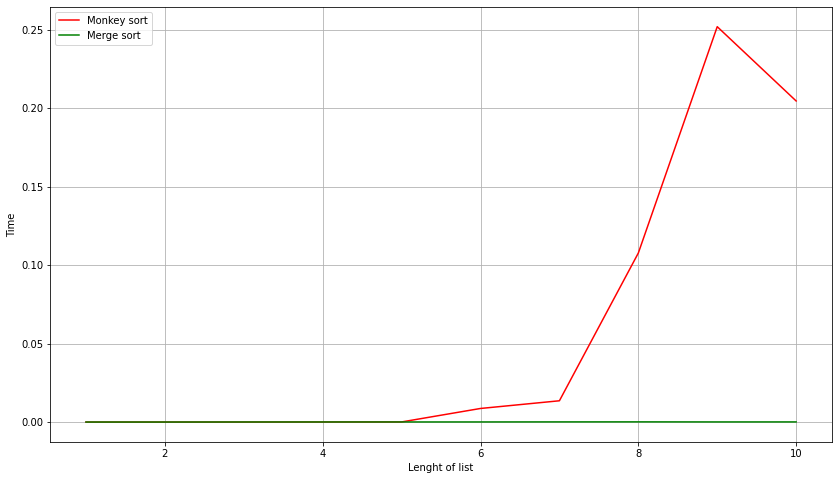

In [60]:
# Merge sort
def merge(a,b):
    c = []
    ind_a = 0
    ind_b = 0
    while ind_a<len(a) and ind_b<len(b):
        if a[ind_a]<b[ind_b]:
            c.append(a[ind_a])
            ind_a+=1
        else:
            c.append(b[ind_b])
            ind_b+=1
    if ind_a == len(a):
        c+= [i for i in b[ind_b:]]
    else: 
        c+= [i for i in a[ind_a:]]
    return(c)

def sort_merge(a):
    if len(a) <= 1:
        return(a)
    m = len(a)//2
    left = a[:m]
    right = a[m:]
    left = sort_merge(left)
    right = sort_merge(right)
    return(merge(left, right))

# Monkey sort
def is_sorted(a):
    if len(a)<=1:
        return True
    sort_list = [a[0]<=a[1]]
    for i in range(1, len(a)-1):
        sort_list.append(a[i]<=a[i+1])
    return all(sort_list)

def monkey_sort(a):
    while not is_sorted(a):
        np.random.shuffle(a)
    return a

# Arrays generation
lenght_of_list, time_for_monkey_sort = np.arange(1, 11), np.zeros(10)
time_for_merge_sort = np.zeros(10)
for i in range(10):
    a = np.arange(i)
    np.random.shuffle(a)
    # for Merge sort
    start = timeit.default_timer()
    sort_merge(a)
    stop = timeit.default_timer()
    time_for_merge_sort[i] = stop - start
    # for Monkey sort
    start = timeit.default_timer()
    monkey_sort(a)
    stop = timeit.default_timer()
    time_for_monkey_sort[i] = stop - start 

# Common graph
fig_dims = (14, 8)
fig, axes = plt.subplots(figsize=fig_dims)
axes.plot(lenght_of_list, time_for_monkey_sort, color="r")
axes.plot(lenght_of_list, time_for_merge_sort, color="g")
axes.set(xlabel='Lenght of list', ylabel='Time')
plt.legend(['Monkey sort', 'Merge sort'])
plt.grid()

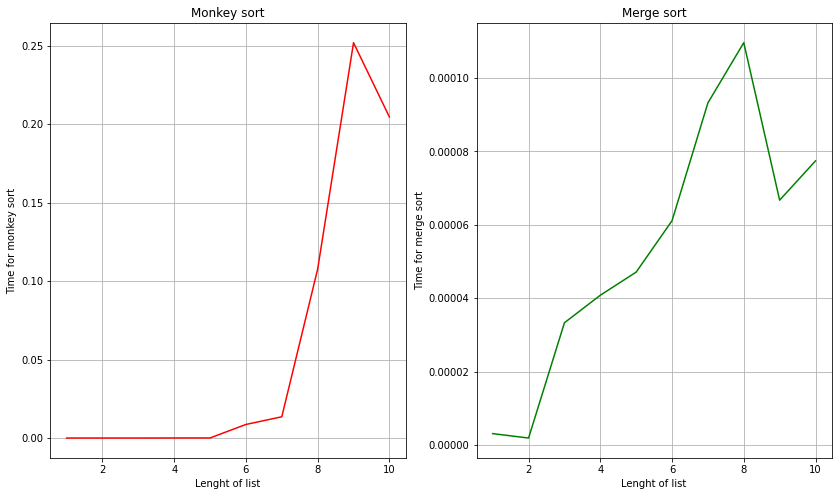

In [61]:
# graph
fig_dims = (14, 8)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
left_graph = axes[0]
right_graph = axes[1]

# Random
left_graph.plot(lenght_of_list, time_for_monkey_sort, color="r")
left_graph.set(xlabel='Lenght of list', ylabel='Time for monkey sort')
left_graph.set_title("Monkey sort")
left_graph.grid()

# Numpy
right_graph.plot(lenght_of_list, time_for_merge_sort, color="g")
right_graph.set(xlabel='Lenght of list', ylabel='Time for merge sort')
right_graph.set_title("Merge sort")
right_graph.grid()

## Task 3

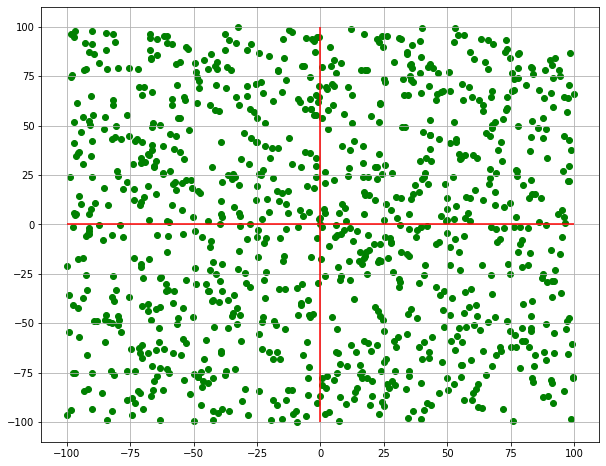

In [62]:
n = 1000
x, y = np.zeros(n), np.zeros(n)
for i in range(n):
    x[i], y[i] = np.random.uniform(-100, 100, 2)
x[0], y[0] = 0, 0
fig_dims = (10, 8)
fig, axes = plt.subplots(figsize=fig_dims)
plt.scatter(x, y, color="g")
axes.vlines(0, -100, 100, color = 'r')
axes.hlines(0, -100, 100, color = 'r')
plt.grid()

## Task 4

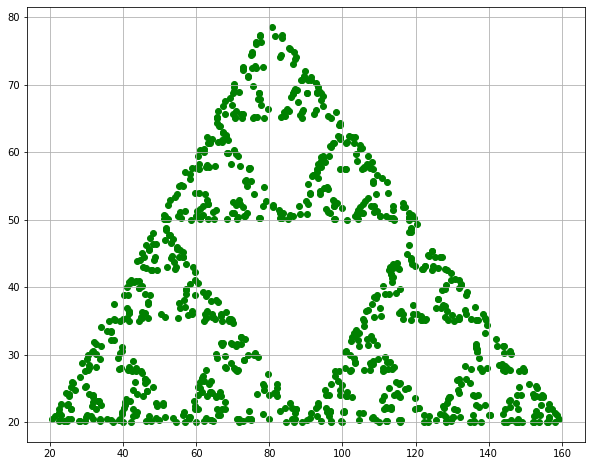

In [63]:
x_ax = np.zeros(1000)
y_ax = np.zeros(1000)
d = {1:(10, 10), 2:(40, 40), 3:(80, 10)}
l = [1, 2, 3]
x_ax[0] = 40
y_ax[0] = 20
for i in range(1, 1000):
    sign = random.choice(l)
    x_ax[i] = d[sign][0] + x_ax[i-1]/2
    y_ax[i] = d[sign][1] + y_ax[i-1]/2

fig_dims = (10, 8)
fig, axes = plt.subplots(figsize=fig_dims)
plt.scatter(x_ax, y_ax, color="g")
plt.grid()

## Task 5

In [64]:
# text = input()
def txet(text):
    text_list = list(map(lambda x: [x], text.split()))
    alpha = list(map(lambda x: list(x[0]), text_list))
    for i in range(len(alpha)):
        if len(alpha[i])>3:
            rand = alpha[i][1:len(alpha[i])-1]
            np.random.shuffle(rand)
            alpha[i] = [alpha[i][0]]+rand+[alpha[i][-1]]
    omega = list(map(lambda s: ''.join(s), alpha))
    return ' '.join(omega)
# print(txet(text))    

In [65]:
text = 'Наука о химическом составе живых клеток и организмов а также о лежащих в основе их жизнедеятельности химических процессах Термин биохимия эпизодически употреблялся с середины XIX века в классическом смысле он был предложен и введён в научную среду в году немецким химиком Карлом Нейбергом'
print(txet(text))

Нуака о хиеимкчосм соавсте жывих коелтк и оозгминарв а ткаже о лжщаеих в онсове их жснзьеетняелдтиои хкиемиичсх пссроцаех Тремин бомихиия эизчседоикпи уебослптлряя с снедреиы XIX вкеа в кислчсоекасм слмсые он был плжеорден и вдеёвн в ннчууаю серду в году неемцикм хмикоим Корлам Нероебгйм
